The challenge was to compute these integrals numericall as accurately as possible.

1. $
\int_0^\infty \frac 1 \pi \frac {\sin(x)} {x} \frac {\sin(x/3)} {x/3} \: \frac {\sin(x/5)} {x/5} \: \text{dx}$
2. $\int_0^\infty \frac 1 \pi \frac {\sin(x)} {x} \frac {\sin(x/3)} {x/3} \: \frac {\sin(x/5)} {x/5} \: \frac {\sin(x/7)} {x/7} \: \text{dx}$
3. $\int_0^\infty \frac 1 \pi \frac {\sin(x)} {x} \frac {\sin(x/3)} {x/3} \: \frac {\sin(x/5)} {x/5} \: \frac {\sin(x/7)} {x/7} \: \frac {\sin(x/9)} {x/9} \: \frac {\sin(x/11)} {x/11} \: \text{dx} \:$
4. $\int_0^\infty \frac 1 \pi \frac {\sin(x)} {x} \frac {\sin(x/3)} {x/3} \: \frac {\sin(x/5)} {x/5} \: \frac {\sin(x/7)} {x/7} \: \frac {\sin(x/9)} {x/9} \: \frac {\sin(x/11)} {x/11} \: \frac {\sin(x/13)} {x/13} \: \text{dx} \:$
5. $\int_0^\infty \frac 1 \pi \frac {\sin(x)} {x} \frac {\sin(x/3)} {x/3} \: \frac {\sin(x/5)} {x/5} \: \frac {\sin(x/7)} {x/7} \: \frac {\sin(x/9)} {x/9} \: \frac {\sin(x/11)} {x/11} \: \frac {\sin(x/13)} {x/13} \: \frac {\sin(x/15)} {x/15} \: \text{dx} $
6. $\int_0^\infty \frac 1 \pi \frac {\sin(x)} {x} \: \frac {\sin(x/4)} {x/4} \:\frac {\sin(x/4)} {x/4} \: \frac {\sin(x/7)} {x/7}\: \frac {\sin(x/7)} {x/7} \: \frac {\sin(x/9)} {x/9} \: \frac {\sin(x/9)} {x/9} \: \text{dx} $

These integrals are so-called Borwein integrals (see https://en.wikipedia.org/wiki/Borwein_integral), whose integral values can be computed exactly. The analytical answers are:

1.  $= 1/2$
2. $=1/2$
3. $=1/2$
4. $=1/2$
5. $\approx 1/2 - 2.31005727255 \cdot 10^{-11}/\pi$
6. $\approx 1/2 - 1.08196998498\cdot  10^{-12}/\pi$ 

Let's store these resulst as code. I use the `decimal` Python package to allow for computations with arbitrary precision:

In [1]:
from decimal import *
getcontext().prec = 30  # Set precision to 30 digits

In [2]:
pi = Decimal("3.141592653589793238462643383279502884197169399375105820974944592307816406286")

answer = [Decimal("0.5"), 
          Decimal("0.5"),
          Decimal("0.5"),
          Decimal("0.5"),
          Decimal("0.5") - Decimal("2.31005727255e-11")/pi,
          Decimal("0.5") - Decimal("1.08196998498e-12")/pi,
         ]

To evaluate the contest, let's import the results from the student. For each student, I stored the 6 computed integrals as a list:

In [ ]:
from student_results import results
results

Now we can loop over each student and compute the largest error of all integrals:

In [4]:
# Compute the largest error for each student
errors = {}
for name, result in results.items():
    errors[name] = max([abs(a-r) for a, r in zip(answer, result)])

And sort the students by their errors:

In [5]:
import operator

# Sort and print name names with associated errors 
sorted_errors = sorted(errors.items(), key=operator.itemgetter(1))

Finally, we can plot the results:

<IPython.core.display.Javascript object>


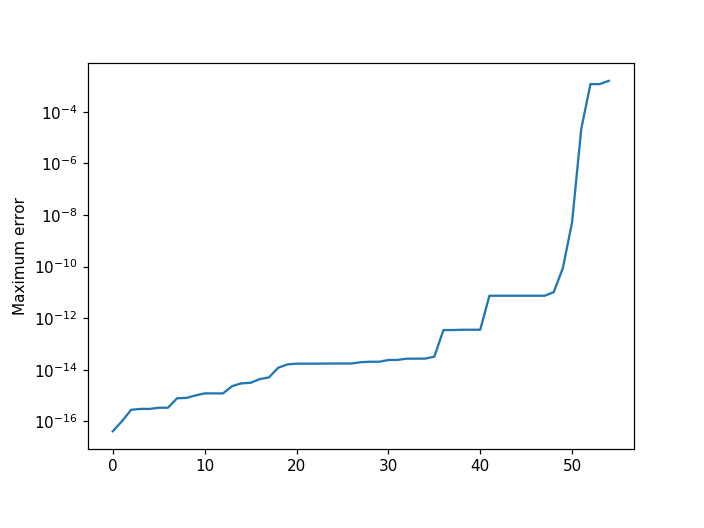

In [6]:
%matplotlib notebook 
import seaborn 
from matplotlib import pylab

# Plot sorted data with logarithmic y-axis
x = [d[0] for d in sorted_errors]
y = [d[1] for d in sorted_errors]

pylab.plot(y)
pylab.ylabel("Maximum error")
pylab.semilogy()
#pylab.xticks(range(len(x)), x, rotation='vertical')
# Pad margins and tweak spacing
#pylab.margins(0.2)
pylab.subplots_adjust(bottom=0.15)
pylab.show()
#pylab.savefig("contest_results.svg")

# ... and the winners are ...

# 3rd place

In [13]:
sorted_errors[2][0]

'henriakj'

with an maximum error of

In [8]:
sorted_errors[2][1]

Decimal('2.77555756E-16')

# 2nd place

In [9]:
sorted_errors[1][0]

'thomahg'

with an maximum error of

In [10]:
sorted_errors[1][1]

Decimal('1E-16')

# 1st place

In [11]:
sorted_errors[0][0]

'fredrul'

with an maximum error of

In [12]:
sorted_errors[0][1]

Decimal('4.0675034284067E-17')